<a href="https://colab.research.google.com/github/Denismwangi01/Time-series-analysis/blob/main/Tesla2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("umerhaddii/tesla-stock-data-2025")

print("Path to dataset files:", path)

100%|██████████| 94.5k/94.5k [00:00<00:00, 18.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/umerhaddii/tesla-stock-data-2025/versions/1


In [2]:
import os
dataset = "/root/.cache/kagglehub/datasets/umerhaddii/tesla-stock-data-2025/versions/1"
os.listdir(dataset)

['TSLA_2010-06-29_2025-02-13.csv']

In [3]:
file_path = (dataset + '/TSLA_2010-06-29_2025-02-13.csv')

import pandas as pd
data = pd.read_csv(file_path)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680 entries, 0 to 3679
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3680 non-null   object 
 1   Open       3680 non-null   float64
 2   High       3680 non-null   float64
 3   Low        3680 non-null   float64
 4   Close      3680 non-null   float64
 5   Adj Close  3680 non-null   float64
 6   Volume     3680 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 201.4+ KB


In [5]:
data.shape

(3680, 7)

In [6]:
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [7]:
data.duplicated().sum()

0

Converting the Date column ensures that you can use time series functionalities in pandas, such as resampling, slicing by date

In [8]:
data['Date']= pd.to_datetime(data['Date'])

data.set_index('Date', inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3680 entries, 2010-06-29 to 2025-02-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3680 non-null   float64
 1   High       3680 non-null   float64
 2   Low        3680 non-null   float64
 3   Close      3680 non-null   float64
 4   Adj Close  3680 non-null   float64
 5   Volume     3680 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 201.2 KB


Calculate daily returns as the percentage change of the closing price

In [9]:
data['Daily_Return']= data['Close'].pct_change()
print(data['Daily_Return'].describe())

count    3679.000000
mean        0.002105
std         0.036143
min        -0.210628
25%        -0.016253
50%         0.001221
75%         0.019414
max         0.243951
Name: Daily_Return, dtype: float64


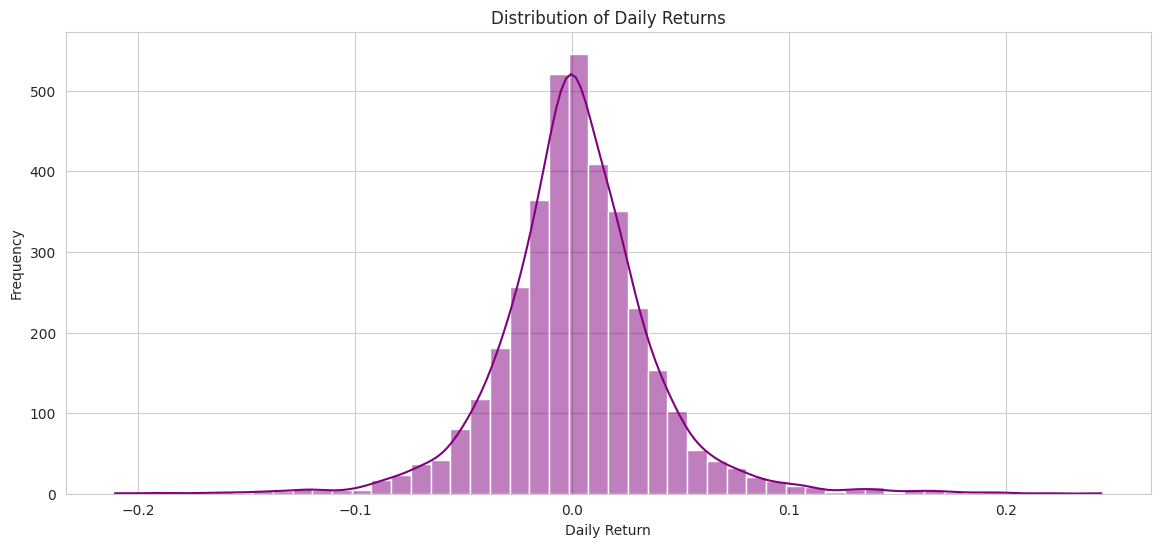

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize= (14,6))
sns.histplot(data['Daily_Return'].dropna(), bins=50, kde=True, color='purple')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

Most returns cluster around 0 (the center), showing that most daily changes are small

<Figure size 1400x600 with 0 Axes>

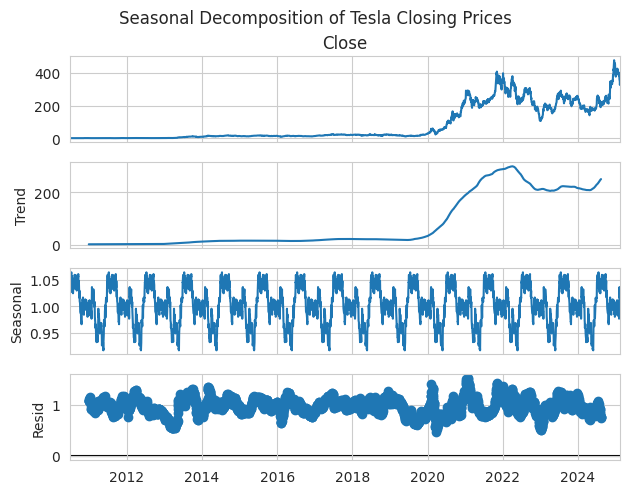

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_result = seasonal_decompose(data['Close'], model='multiplicative', period=252)
plt.figure(figsize=(14,6))

decomposition_result.plot()
plt.suptitle('Seasonal Decomposition of Tesla Closing Prices', y=1.02)
plt.show()

## Close
Had a big rise after 2020, reaching peaks around $400

## Trend
Shows the long-term direction of the stock price upward trend starting in 2020

## Seasonal
 zigzag pattern shows if there are regular times when the stock tends to go up or down

## Residual
These are the random movements that don't fit the other patterns

<Figure size 1400x600 with 0 Axes>

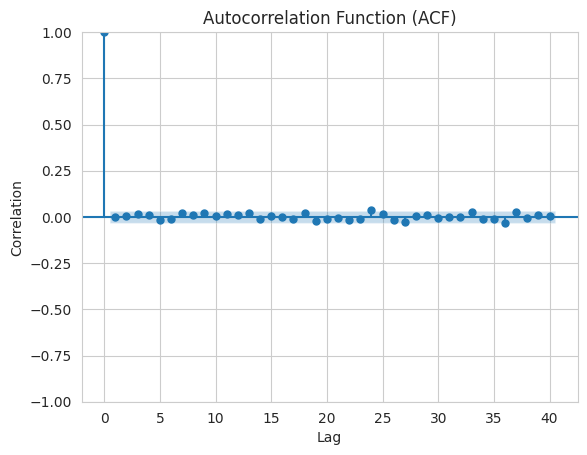

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
daily_returns = data['Close'].pct_change().dropna()

plt.figure(figsize=(14,6))
plot_acf(daily_returns, lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()


stock price changes appear to be mostly random very little correlation between price changes on different days

<Figure size 1400x600 with 0 Axes>

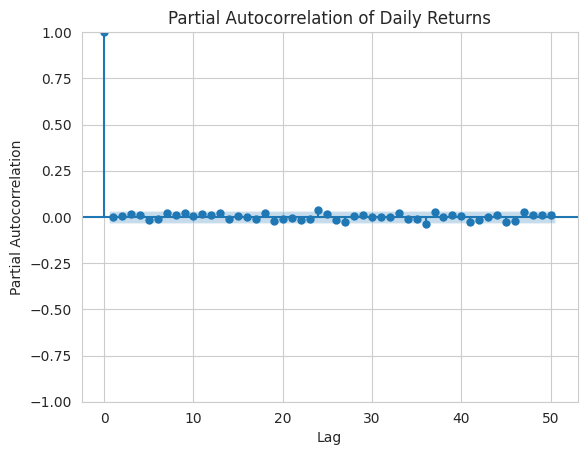

In [16]:
plt.figure(figsize=(14,6))
plot_pacf(daily_returns, lags=50)
plt.title("Partial Autocorrelation of Daily Returns")
plt.xlabel("Lag")
plt.ylabel("Partial Autocorrelation")
plt.show()

Just like the ACF, this suggests Tesla's daily returns are mostly random